# Investigate Hotel Business using Data Visualization

## Data Preprocessing

### Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

### Read dataset

In [2]:
df = pd.read_csv('C:/Users/62812/Downloads/hotel_bookings_data.csv')
print(df.shape)
df.head()

(119390, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
# View general info from a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# View statistical descriptions of dataframes
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Handle Missing Values

In [5]:
# First check which column has null data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
# There are 4 columns that have null values 

# We can fill the children column with 0 indicating there are no children in the hotel booking data
df['children'] = df['children'].fillna(0)

# We can fill the city column with "unknown" because the country of origin of the hotel booker is unknown.
df['city'] = df['city'].fillna('unknown')

# We can also fill the agent and company columns with 0 as an "undefined" value.
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Replace Inappropriate Values

In [7]:
# The "meal" data contains the value "Undefined", which is actually the same as "No Meal"
df["meal"].replace("Undefined", "No Meal", inplace=True)

### Delete Unnecessary Data

In [8]:
# Create total guest data which is the sum of adults, children, and babies
df["guest"] = df["adults"]+df["children"]+df["babies"]
print("Data with 0 guest: {0} out of {1} all data".format(df[df["guest"] == 0].shape[0], df.shape[0]))

# We will delete the data that has 0 guests
df_preprocessing = df[df["guest"] > 0].copy()
df_preprocessing.shape

Data with 0 guest: 180 out of 119390 all data


(119210, 30)

### All in One Preprocessing 

In [9]:
# This part contains the 3 steps we have done and packed in one cell, to make it more efficient

# Read data
df = pd.read_csv('C:/Users/62812/Downloads/hotel_bookings_data.csv') 

# Filling null values
nan_replacements = {"children:": 0.0, "city": "Unknown", "agent": 0, "company": 0}
df_fill = df.fillna(nan_replacements)

# Replace inappropriate values
df_fill["meal"].replace("Undefined", "No Meal", inplace=True)

# Delete data with a total of 0 guests
df_fill["guest"] = df_fill["adults"]+df_fill["children"]+df_fill["babies"]
df_prep = df_fill[df_fill["guest"] > 0].copy()

print("before pre-processing: ", df.shape[0])
print("after pre-processing: ", df_prep.shape[0])

before pre-processing:  119390
after pre-processing:  119206


In [10]:
df['arrival_date_year'].unique()

array([2017, 2018, 2019], dtype=int64)

## Monthly Hotel Booking Analysis Based on Hotel Type

### Calculating the Monthly Number of Hotel Bookings by Hotel Type

In [11]:
# Copy the pre-processed data
df1 = df_prep.copy()

# Create aggregation data to calculate the number of hotel bookings per month by hotel type
df1_gr = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_gr.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel
df1_gr

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


### Normalize the Data for Proper Comparison.

Note that the data for July and August is taken from 3 years ago, while the other months are only taken from 2 years ago, it is necessary to normalize it so that the comparison is appropriate.

In [12]:
# Normalization to get the average number of orders in a month in different years
df1_gr['average_num_booking'] = round(df1_gr['num_booking']/df1_gr['unique_year'])
df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0


### Sorting Data by Month

It is better to abbreviate the name of the month, to facilitate visualization. Therefore, a new column is created that contains the abbreviation of the month name, namely the first 3 letters of the month name.

In [13]:
# Sort data by month and generate month acronyms to make it easier to visualize.
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1_gr["month"] = df1_gr["arrival_month"].str[:3] 
df1_gr["month"] = pd.Categorical(df1_gr["month"], categories=ordered_months, ordered=True) 

df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


### Data Visualization

The plot's objective is to compare two types of hotels each month. From January through December, two types of hotels are available: city hotels and resort hotels. As a result, a line plot is the best option.

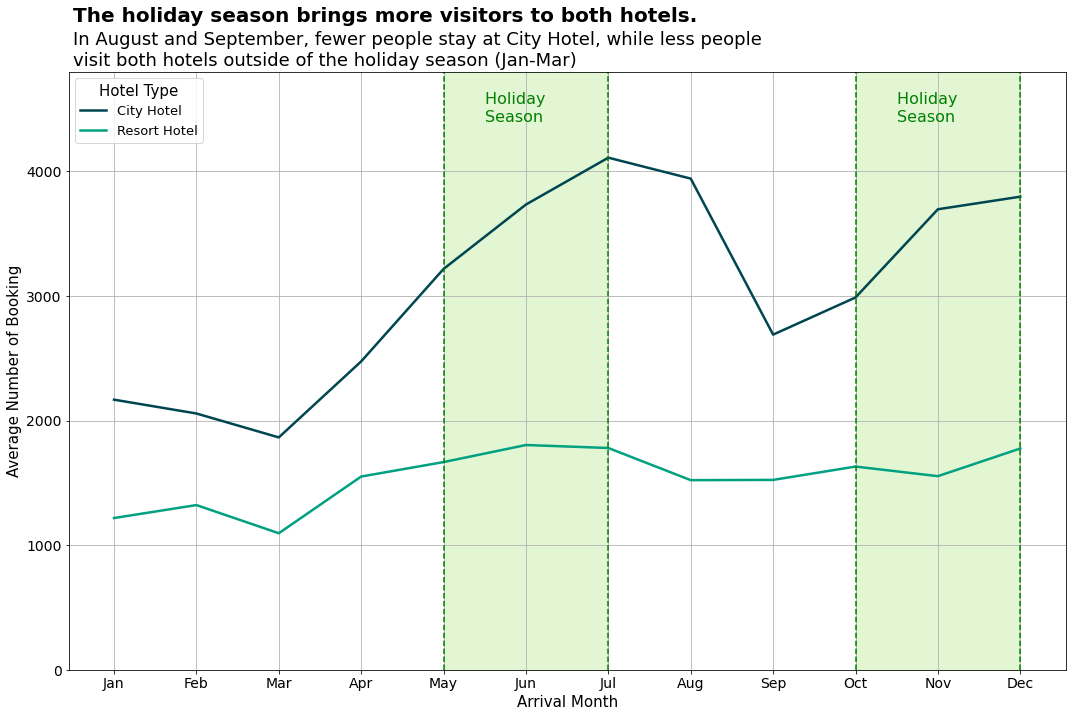

In [14]:
plt.figure(figsize=(15,10)) 
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', 
             size="hotel_type", sizes=(2.5, 2.5), palette=['#004651','#00A181'], data=df1_gr) 

plt.tick_params(axis='both', which='major', labelsize=14) 
plt.grid() 
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xlabel('Arrival Month', fontsize=15) 
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0, 4800) 

plt.axvline(4, ls='--', color='Green') 
plt.axvline(6, ls='--', color='Green')
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='Green') 
plt.stackplot(np.arange(4,7,1), [[4800]], color='#A4E473', alpha=0.3) 

plt.axvline(9, ls='--', color='green')
plt.axvline(11, ls='--', color='green')
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='green') 
plt.stackplot(np.arange(9,12,1), [[4800]], color='#A4E473', alpha=0.3) 

plt.text(x=-0.5, y=5200, s="The holiday season brings more visitors to both hotels.", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=4850, s="In August and September, fewer people stay at City Hotel, while less people \nvisit both hotels outside of the holiday season (Jan-Mar)", 
         fontsize=18)

plt.tight_layout() 
#plt.savefig('fig/investigate_hotel_business_v01.png', dpi=200); 

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### Duration of Stay by Hotel Type

<AxesSubplot:xlabel='total_nights', ylabel='Count'>

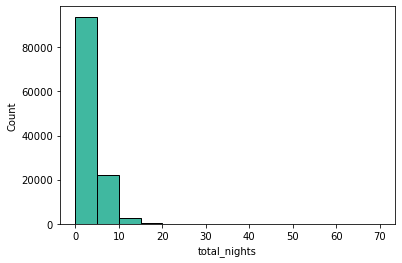

In [15]:
# Copy the pre-processed data
df2 = df_prep.copy()

# Perform data aggregation to obtain duration of stay by hotel type
df2["total_nights"] = df2["stays_in_weekend_nights"] + df2["stays_in_weekdays_nights"] # mencari total malam yang dipesan

sns.histplot(data=df2, x="total_nights", binwidth=5, color="#00A181")

### Grouping Data Based on Duration of Stay

According to the histogram above, the data distribution appears to be right-skewed. As a result, grouping is used to make the distribution more even. The grouping is done for the total number of nights that reach 3 weeks, then from the 15th to the 21st night (15-21). Furthermore, for total nights that exceed 3 weeks (>21)

In [16]:
# Grouping data based on observations of data distribution
df2['total_nights_group'] = np.where(df2['total_nights'] > 21, 21, 
                                       np.where(df2['total_nights'] > 14, 15, df2['total_nights']))

# Create aggregate table
df2_gr = df2.groupby(['hotel', 'is_canceled', 'total_nights_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_pivot = df2_gr.pivot_table(index=['hotel', 'total_nights_group'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)

df2_pivot.head(100)

is_canceled,hotel,total_nights_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4102,30.94
2,City Hotel,2,10983,10430,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,807,39.33
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


### Data Visualization

The plot's objective is to compare two types of hotels against the length of the customer's stay, hence a bar chart is employed to show the hotel booking cancellation rate. In addition, we will evaluate how the length of stay influences the hotel booking cancellation rate, therefore the data trend will be provided.

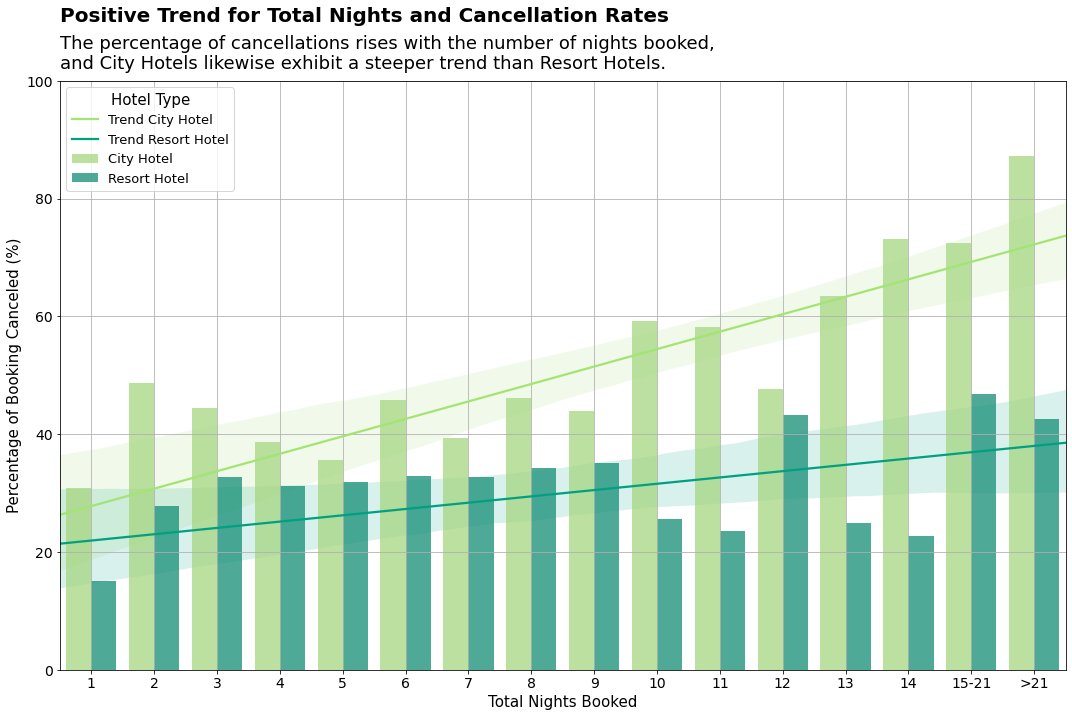

In [17]:
plt.figure(figsize=(15,10))
sns.regplot(x='total_nights_group', y='pct_canceled', color='#A4E473', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='total_nights_group', y='pct_canceled', color='#00A181', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='total_nights_group', y='pct_canceled', hue='hotel', data=df2_pivot, palette=['#A4E473','#00A181'], alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) 
plt.grid() 
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) 
plt.xlabel('Total Nights Booked', fontsize=15)  
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) 
plt.ylim(0, 100) 
plt.xlim(0.5, 16.5) 

plt.text(x=0.5, y=110, s="Positive Trend for Total Nights and Cancellation Rates", 
         fontsize=20, fontweight='bold') 
plt.text(x=0.5, y=102, s="The percentage of cancellations rises with the number of nights booked,\nand City Hotels likewise exhibit a steeper trend than Resort Hotels.", 
         fontsize=18) 

plt.tight_layout() 
#plt.savefig('fig/investigate_hotel_business_v02.png', dpi=200); 

## Analysis of the Effect of Booking Time Distance on Hotel Booking Cancellation Rates

### Booking Time Distance to Hotel Booking Cancellation

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

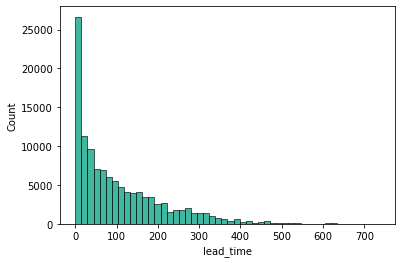

In [18]:
# Copy the pre-processed data
df3 = df_prep.copy() 

sns.histplot(data=df2, x="lead_time", bins=50, color="#00A181")

### Grouping the Ordering Time Interval Into Monthly Units

Based on the histogram above, it can be seen that the distribution of data looks right-skewed. Therefore, grouping is done to make the distribution more even. The ordering time interval, which was originally in daily units, is grouped into monthly units, namely per 30 days.

In [19]:
# Categorize the lead_time column to make it simpler
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [20]:
# Perform data aggregation to determine the number of reservations based on the lead time group and hotel type.
df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5180,23240,22.289157
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


### Data Visualization

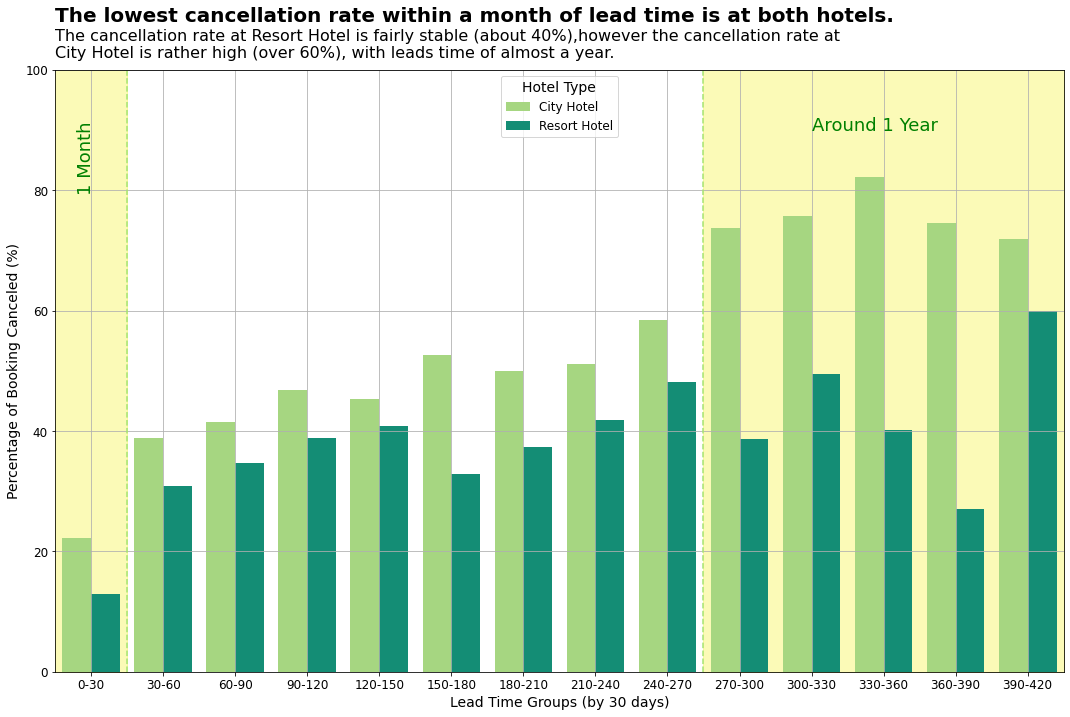

In [21]:
plt.figure(figsize=(15,10)) 
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type',palette=['#A4E473','#00A181'], data=df3_pivot) 

plt.tick_params(axis='both', which='major', labelsize=12) 
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) 

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) 
plt.ylim(0, 100) 
plt.xlim(-0.5,13.5) 

plt.axvline(0.5, ls='--', color='#A4E473') 
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='green', rotation=90)
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='#F2EF12', alpha=0.3) 

plt.axvline(8.5, ls='--', color='#A4E473') 
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='green')
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='#F2EF12', alpha=0.3) 

plt.text(x=-0.5, y=108, s="The lowest cancellation rate within a month of lead time is at both hotels.", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=102, s="The cancellation rate at Resort Hotel is fairly stable (about 40%),however the cancellation rate at \nCity Hotel is rather high (over 60%), with leads time of almost a year.", 
         fontsize=16) 
 
plt.tight_layout() 
#plt.savefig('fig/investigate_hotel_business_v03.png', dpi=200); # menyimpan gambar